<a href="https://colab.research.google.com/github/bipulsimkhada/CNN-CiFAR_10/blob/main/CiFAR_10_Images_Classification_Using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# (CIFAR-10) USING CNNs



- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html




```

```

# STEP #1: IMPORT LIBRARIES/DATASETS

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [47]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [48]:
X_train.shape

(50000, 32, 32, 3)

In [49]:
X_test.shape

(10000, 32, 32, 3)

In [50]:
y_train.shape

(50000, 1)

In [51]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[1]


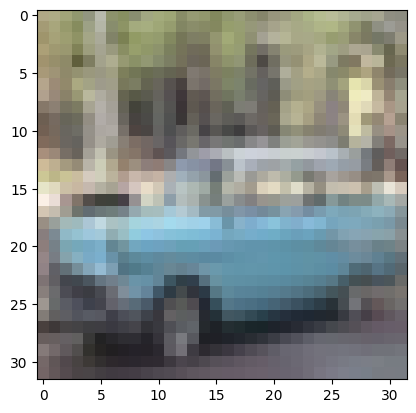

In [52]:
i = 30245
plt.imshow(X_train[i])
print(y_train[i])

# STEP #3: DATA PREPARATION

In [53]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [54]:
# There are total number of 10 catagery in the dataset
number_cat = 10 

In [55]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [56]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [58]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [59]:
X_train = X_train/255
X_test = X_test/255


In [60]:
X_train.shape

(50000, 32, 32, 3)

In [61]:
Input_shape = X_train.shape[1:]


# STEP #4: TRAIN THE MODEL

In [69]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

In [74]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))




model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))

model.add(Dense(units = 10, activation = 'softmax'))

In [75]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [76]:
history = model.fit(X_train, y_train, batch_size = 16, epochs = 10, shuffle = True)

Epoch 1/10
3125/3125 [==============================] - 169s 54ms/step - loss: 1.4433 - accuracy: 0.4783
Epoch 2/10
3125/3125 [==============================] - 170s 54ms/step - loss: 1.1089 - accuracy: 0.6108
Epoch 3/10
3125/3125 [==============================] - 169s 54ms/step - loss: 0.9559 - accuracy: 0.6642
Epoch 4/10
3125/3125 [==============================] - 164s 52ms/step - loss: 0.8416 - accuracy: 0.7047
Epoch 5/10
3125/3125 [==============================] - 164s 53ms/step - loss: 0.7506 - accuracy: 0.7369
Epoch 6/10
3125/3125 [==============================] - 163s 52ms/step - loss: 0.6768 - accuracy: 0.7628
Epoch 7/10
3125/3125 [==============================] - 164s 53ms/step - loss: 0.6102 - accuracy: 0.7854
Epoch 8/10
3125/3125 [==============================] - 163s 52ms/step - loss: 0.5604 - accuracy: 0.8025
Epoch 9/10
3125/3125 [==============================] - 165s 53ms/step - loss: 0.5080 - accuracy: 0.8217
Epoch 10/10
3125/3125 [==============================] 

# STEP #5: EVALUATE THE MODEL

In [79]:
evaluation = model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 13s 42ms/step - loss: 1.0210 - accuracy: 0.6940
Test Accuracy: 0.6940000057220459
